In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data\\tmp_df.csv")
target = pd.read_csv('data\\kpIndex.csv', sep=';', header=None)
target.columns = ['date', 'kp']
target['kp_test'] = target['kp'].shift(-1)
result_train = df.merge(target, on='date', how='left')

In [4]:
df = pd.read_csv('aaaaaa.csv')

train_data = np.array([])
train_labels = np.array([])

for i in range(0, 3277440, 180):
    tmp_df = result_train.iloc[i : i+180]
    label = tmp_df.iloc[0]['kp_test']
    data = tmp_df.drop(columns=['date', 'kp', 'kp_test']).mean()
    data = np.array(data)
    train_data = np.append([train_data], data)
    train_labels = np.append([train_labels], label)

In [5]:
train_data[np.isnan(train_data)] = 0
X_train = train_data.reshape(18208, 53)
y_train = train_labels.reshape(18208, 1)
y_train = np.nan_to_num(y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [7]:
train_data[np.isnan(train_data)] = 0

In [186]:
len(X_train), len(X_test)

(16387, 1821)

In [9]:
criterion = torch.nn.L1Loss()

In [10]:
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.augmentations import RegressionSMOTE
aug = RegressionSMOTE(p=0.2)
clf = TabNetRegressor() 
clf.fit(
  X_train, y_train, loss_fn=criterion,
  eval_set=[(X_test, y_test)],

  augmentations=aug
)
  # max_epochs = 1000,
  # patience =70,
preds = clf.predict(X_test)

c:\Users\kubad\Desktop\hackathon\venv\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.77562 | val_0_mse: 19.95153|  0:00:02s
epoch 1  | loss: 0.92643 | val_0_mse: 5.39524 |  0:00:03s
epoch 2  | loss: 0.7849  | val_0_mse: 7.6077  |  0:00:05s
epoch 3  | loss: 0.76368 | val_0_mse: 4.11265 |  0:00:06s
epoch 4  | loss: 0.74995 | val_0_mse: 2.5121  |  0:00:07s
epoch 5  | loss: 0.71588 | val_0_mse: 2.22333 |  0:00:08s
epoch 6  | loss: 0.69092 | val_0_mse: 2.69219 |  0:00:09s
epoch 7  | loss: 0.67669 | val_0_mse: 2.19845 |  0:00:10s
epoch 8  | loss: 0.67066 | val_0_mse: 1.50573 |  0:00:11s
epoch 9  | loss: 0.66116 | val_0_mse: 1.30951 |  0:00:13s
epoch 10 | loss: 0.64946 | val_0_mse: 1.02173 |  0:00:14s
epoch 11 | loss: 0.6457  | val_0_mse: 1.03694 |  0:00:15s
epoch 12 | loss: 0.64951 | val_0_mse: 0.89555 |  0:00:16s
epoch 13 | loss: 0.65365 | val_0_mse: 0.90788 |  0:00:17s
epoch 14 | loss: 0.64232 | val_0_mse: 0.81499 |  0:00:18s
epoch 15 | loss: 0.63958 | val_0_mse: 0.7784  |  0:00:19s
epoch 16 | loss: 0.64045 | val_0_mse: 0.76589 |  0:00:21s
epoch 17 | los

c:\Users\kubad\Desktop\hackathon\venv\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
clf.save_model('./model_tabnet')

In [101]:
df_results = pd.DataFrame(data={'preds': preds.reshape(1821),
                   'true': y_test.reshape(1821)})

In [102]:
df_results.to_csv('results.csv', index=False)

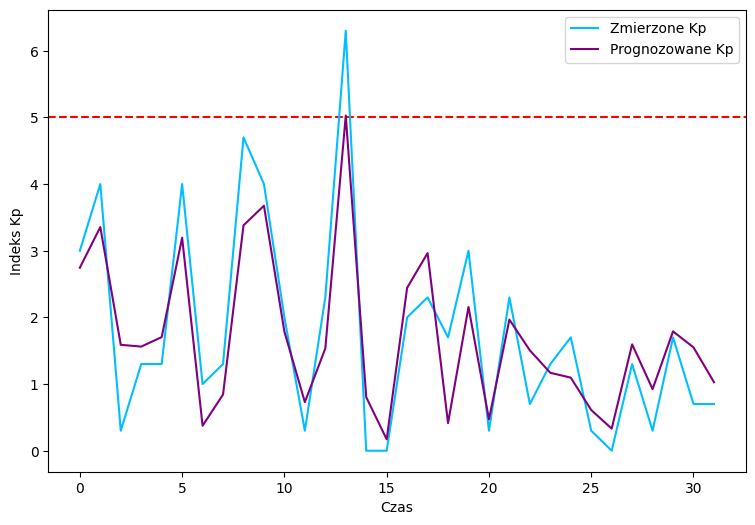

In [190]:
import matplotlib.pyplot as plt
#random chunk of data
x =940
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(9, 6))
plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.plot(range(len(y_test[x:x + 32])), y_test[x:x + 32], label='Zmierzone Kp', color='deepskyblue')
plt.plot(range(len(y_test[x:x + 32])), preds[x:x + 32], label='Prognozowane Kp', color='purple')
plt.xlabel('Czas')
plt.ylabel('Indeks Kp')
plt.legend()
plt.show()